# **Instacart Basket Analysis 2024 - Part 1**

# Part 1: Data Preparation, Analysis, and Visualization
Task 1: Import the Dataset
Set up the Jupyter Notebook:

In [3]:
#import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set the project path:

In [6]:
path = r'C:\Users\Asus\Music\Instacart Basket Analysis'
vis_path = os.path.join(path, 'Analysis', 'Visualizations')

# Load the datasets:

In [9]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_final.pkl'))
customers = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'customers.csv'))
df = df.merge(customers, on='user_id', how='left')

# Visualize and save the first few rows of the merged dataframe:

In [11]:
df.head()
df.head().to_string(os.path.join(vis_path, 'data_head.txt'))

In [12]:
print(df.head())

   Unnamed: 0_x  order_id  user_id eval_set  order_number  order_dow  \
0             0   2539329        1    prior             1          2   
1             0   2539329        1    prior             1          2   
2             0   2539329        1    prior             1          2   
3             0   2539329        1    prior             1          2   
4             0   2539329        1    prior             1          2   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  8                     NaN         196                  1   
1                  8                     NaN       14084                  2   
2                  8                     NaN       12427                  3   
3                  8                     NaN       26088                  4   
4                  8                     NaN       26405                  5   

   ...  First Name  Surnam  Gender    STATE  Age  date_joined n_dependants  \
0  ...       L

# Task 2: Consider Security Implications
Identify and remove PII (Personally Identifiable Information):

In [17]:
df = df.drop(columns=['First Name', 'Surnam'])

# Visualize and save the dataset columns to confirm PII removal:

In [20]:
columns_info = df.columns.to_list()
with open(os.path.join(vis_path, 'columns_info.txt'), 'w') as f:
    f.write('\n'.join(columns_info))

In [22]:
print(df.columns)

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_period_of_day', 'price_label', 'busiest_day', 'busiest_days',
       'loyalty_flag', 'order_count', 'spending_flag', 'spending_category',
       'order_frequency_flag', 'order_frequency_category', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'Prices'],
      dtype='object')


# Task 3: Regional Segmentation
Define the regions based on states:

In [25]:
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}


# Assign regions to the dataset:

In [28]:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

df['Region'] = df['STATE'].apply(get_region)


# Visualize and save the distribution of customers by region:

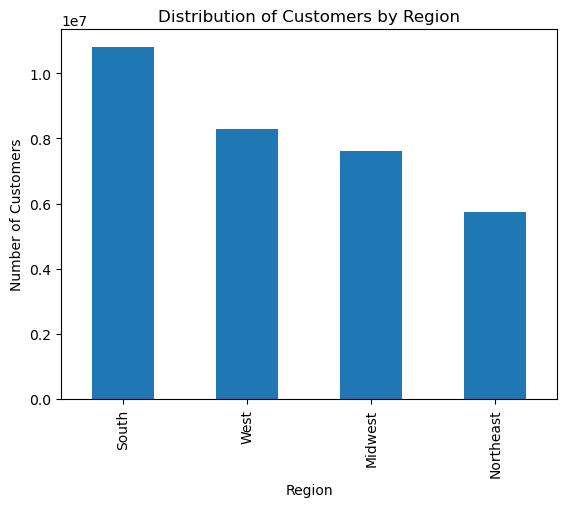

In [31]:
region_dist = df['Region'].value_counts()
region_dist.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Region')
plt.savefig(os.path.join(vis_path, 'region_distribution.png'))
plt.show()

# Analyze and save spending habits by region:

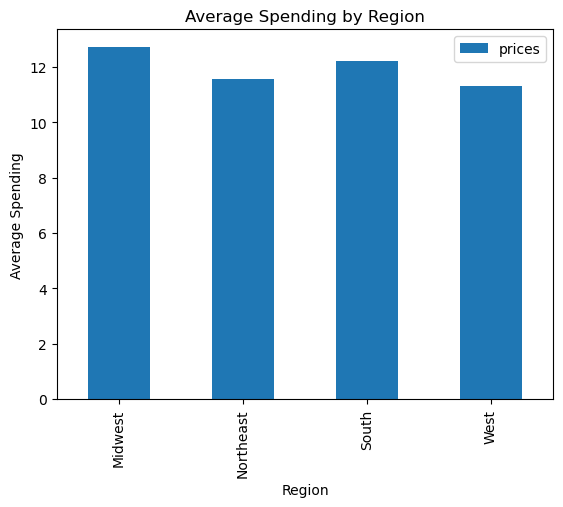

In [34]:
spending_by_region = df.groupby('Region')['prices'].mean().reset_index()

spending_by_region.plot(x='Region', y='prices', kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Spending')
plt.title('Average Spending by Region')
plt.savefig(os.path.join(vis_path, 'spending_by_region.png'))
plt.show()


# Task 4: Exclusion Flag for Low-Activity Customers
Create an exclusion flag:

In [37]:
df['exclusion_flag'] = df.groupby('user_id')['order_id'].transform('count') < 5

# Filter out low-activity customers:

In [40]:
df = df[df['exclusion_flag'] == False]
df = df.drop(columns=['exclusion_flag'])

# Visualize and save the distribution of the number of orders per customer:

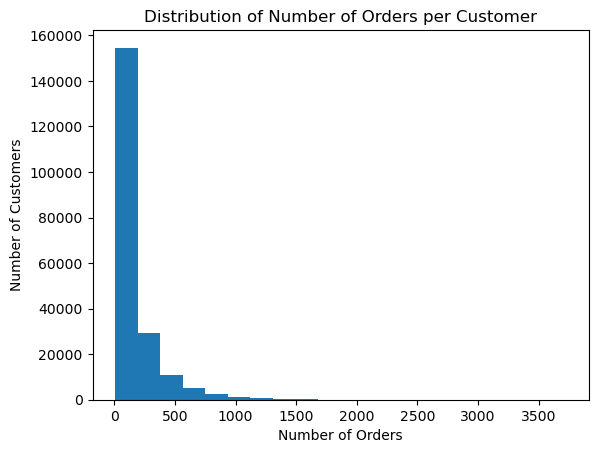

In [43]:
order_dist = df.groupby('user_id')['order_id'].count()
order_dist.plot(kind='hist', bins=20)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')
plt.savefig(os.path.join(vis_path, 'order_distribution.png'))
plt.show()

# Task 5: Customer Profiling
Create profiling variables:

In [48]:
def get_profile(row):
    if row['Age'] < 30 and row['income'] < 50000:
        return 'Young low-income'
    elif row['Age'] < 30 and row['income'] >= 50000:
        return 'Young high-income'
    elif row['Age'] >= 30 and row['income'] < 50000:
        return 'Older low-income'
    else:
        return 'Older high-income'

df['profile'] = df.apply(get_profile, axis=1)

# Visualize and save the distribution of customer profiles:

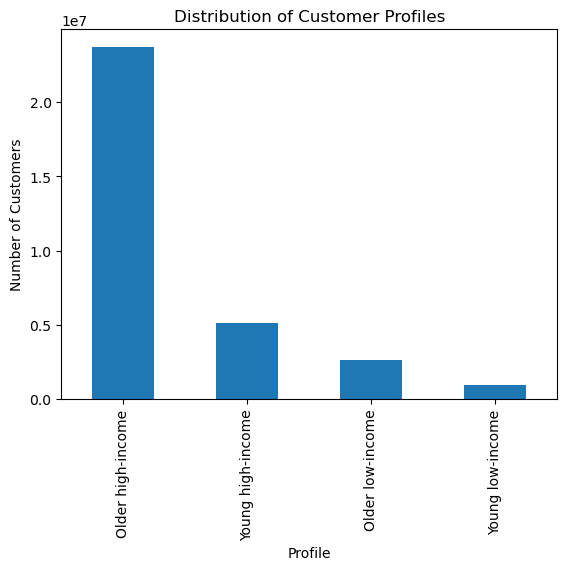

In [51]:
profile_dist = df['profile'].value_counts()
profile_dist.plot(kind='bar')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Profiles')
plt.savefig(os.path.join(vis_path, 'profile_distribution.png'))
plt.show()

# Task 6: Visualization of Profiles
The visualization of customer profiles was already created in Task 5.

# Task 7: Aggregate Max, Mean, and Min for Profiles
Calculate and save aggregate metrics:

In [56]:
profile_agg = df.groupby('profile').agg({'order_id': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']}).reset_index()
profile_agg.to_csv(os.path.join(vis_path, 'profile_aggregate.csv'), index=False)

# Visualize and save the aggregated data:

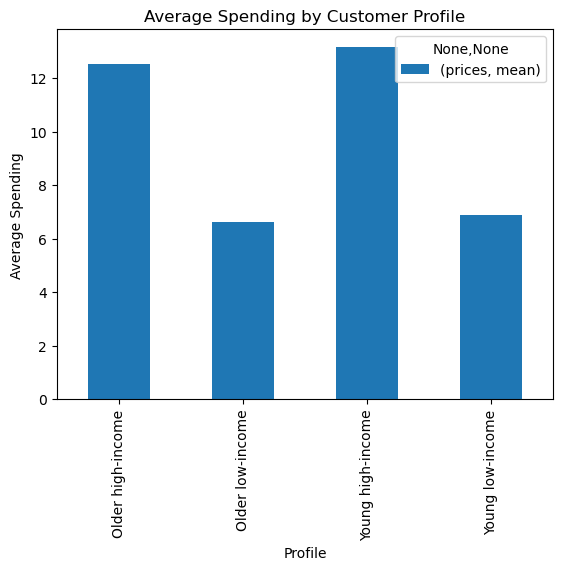

In [59]:
profile_agg.plot(x='profile', y=('prices', 'mean'), kind='bar')
plt.xlabel('Profile')
plt.ylabel('Average Spending')
plt.title('Average Spending by Customer Profile')
plt.savefig(os.path.join(vis_path, 'avg_spending_by_profile.png'))
plt.show()

# Task 8: Compare Profiles with Regions and Departments
Cross-tabulate profiles with regions and save the chart:

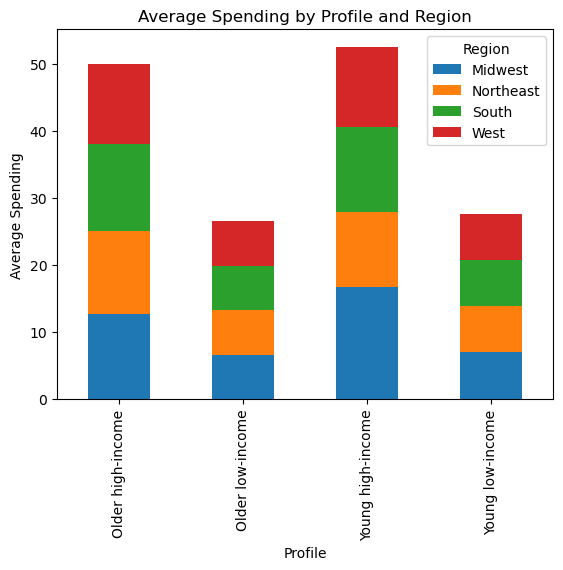

In [62]:
profile_region = pd.crosstab(df['profile'], df['Region'], values=df['prices'], aggfunc='mean').reset_index()

profile_region.set_index('profile').plot(kind='bar', stacked=True)
plt.xlabel('Profile')
plt.ylabel('Average Spending')
plt.title('Average Spending by Profile and Region')
plt.savefig(os.path.join(vis_path, 'profile_region_spending.png'))
plt.show()

# Cross-tabulate profiles with departments and save the chart:

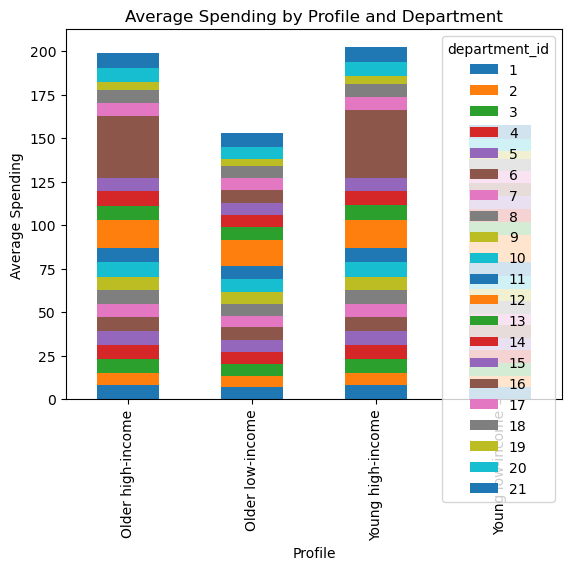

In [65]:
profile_department = pd.crosstab(df['profile'], df['department_id'], values=df['prices'], aggfunc='mean').reset_index()

profile_department.set_index('profile').plot(kind='bar', stacked=True)
plt.xlabel('Profile')
plt.ylabel('Average Spending')
plt.title('Average Spending by Profile and Department')
plt.savefig(os.path.join(vis_path, 'profile_department_spending.png'))
plt.show()

In [ ]:
# Task 9: Produce Charts and Export Them
Save the visualizations created in previous steps.
# Task 10: Tidy Up Script and Export Final Dataset
This structure ensures that each visualization is displayed in our Jupyter notebook and saved to the specified directory.